## **DATA PRE-PROCESSING**

### **Load Data**

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving ORIGIN_DATA.csv to ORIGIN_DATA.csv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# data setup
import io
data = pd.read_csv(io.BytesIO(data_to_load['ORIGIN_DATA.csv']),parse_dates=["DATE"])
data.head()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,DATE,AFRIB,ALRCB,BFBLRIB,BLBLRCB,CEMENT,CIC,CPI,CRUDEBRUSD,DEPBANKSYS,...,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDP,GDPGR
0,2005-01-01,NaN,5.98,NaN,NaN,NaN,78.8,86.5,48.20,NaN,...,16.586150,-1.202379,-25.209614,13.770724,17.021932,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,NaN,5.95,NaN,NaN,NaN,79.2,86.6,51.75,NaN,...,17.012425,0.496053,-30.095037,13.311949,18.740244,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,NaN,5.90,NaN,NaN,NaN,79.7,86.6,55.40,NaN,...,17.425686,-3.872908,-28.635682,7.266388,18.691811,33740.0,15369.0,734.0,175761.0765,NaN
3,2005-04-01,NaN,5.97,NaN,NaN,NaN,79.4,86.8,49.72,NaN,...,16.898292,-5.918167,-27.502528,-2.279316,19.450792,NaN,NaN,NaN,NaN,NaN
4,2005-05-01,NaN,5.94,NaN,NaN,NaN,79.0,87.5,51.97,NaN,...,17.701599,-4.258431,-24.546425,10.795153,18.779487,NaN,NaN,NaN,NaN,NaN


In [3]:
# Import Necessary Libraries

#!pip install pyod

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
from scipy.stats.mstats import zscore
#from pyod.models.abod import ABOD
#from pyod.models.knn import KNN
import seaborn as sns
#from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from pandas import Series
from matplotlib import pyplot

#import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import itertools
import math
import random


In [4]:
df=data.copy()

### **Data Exploration**

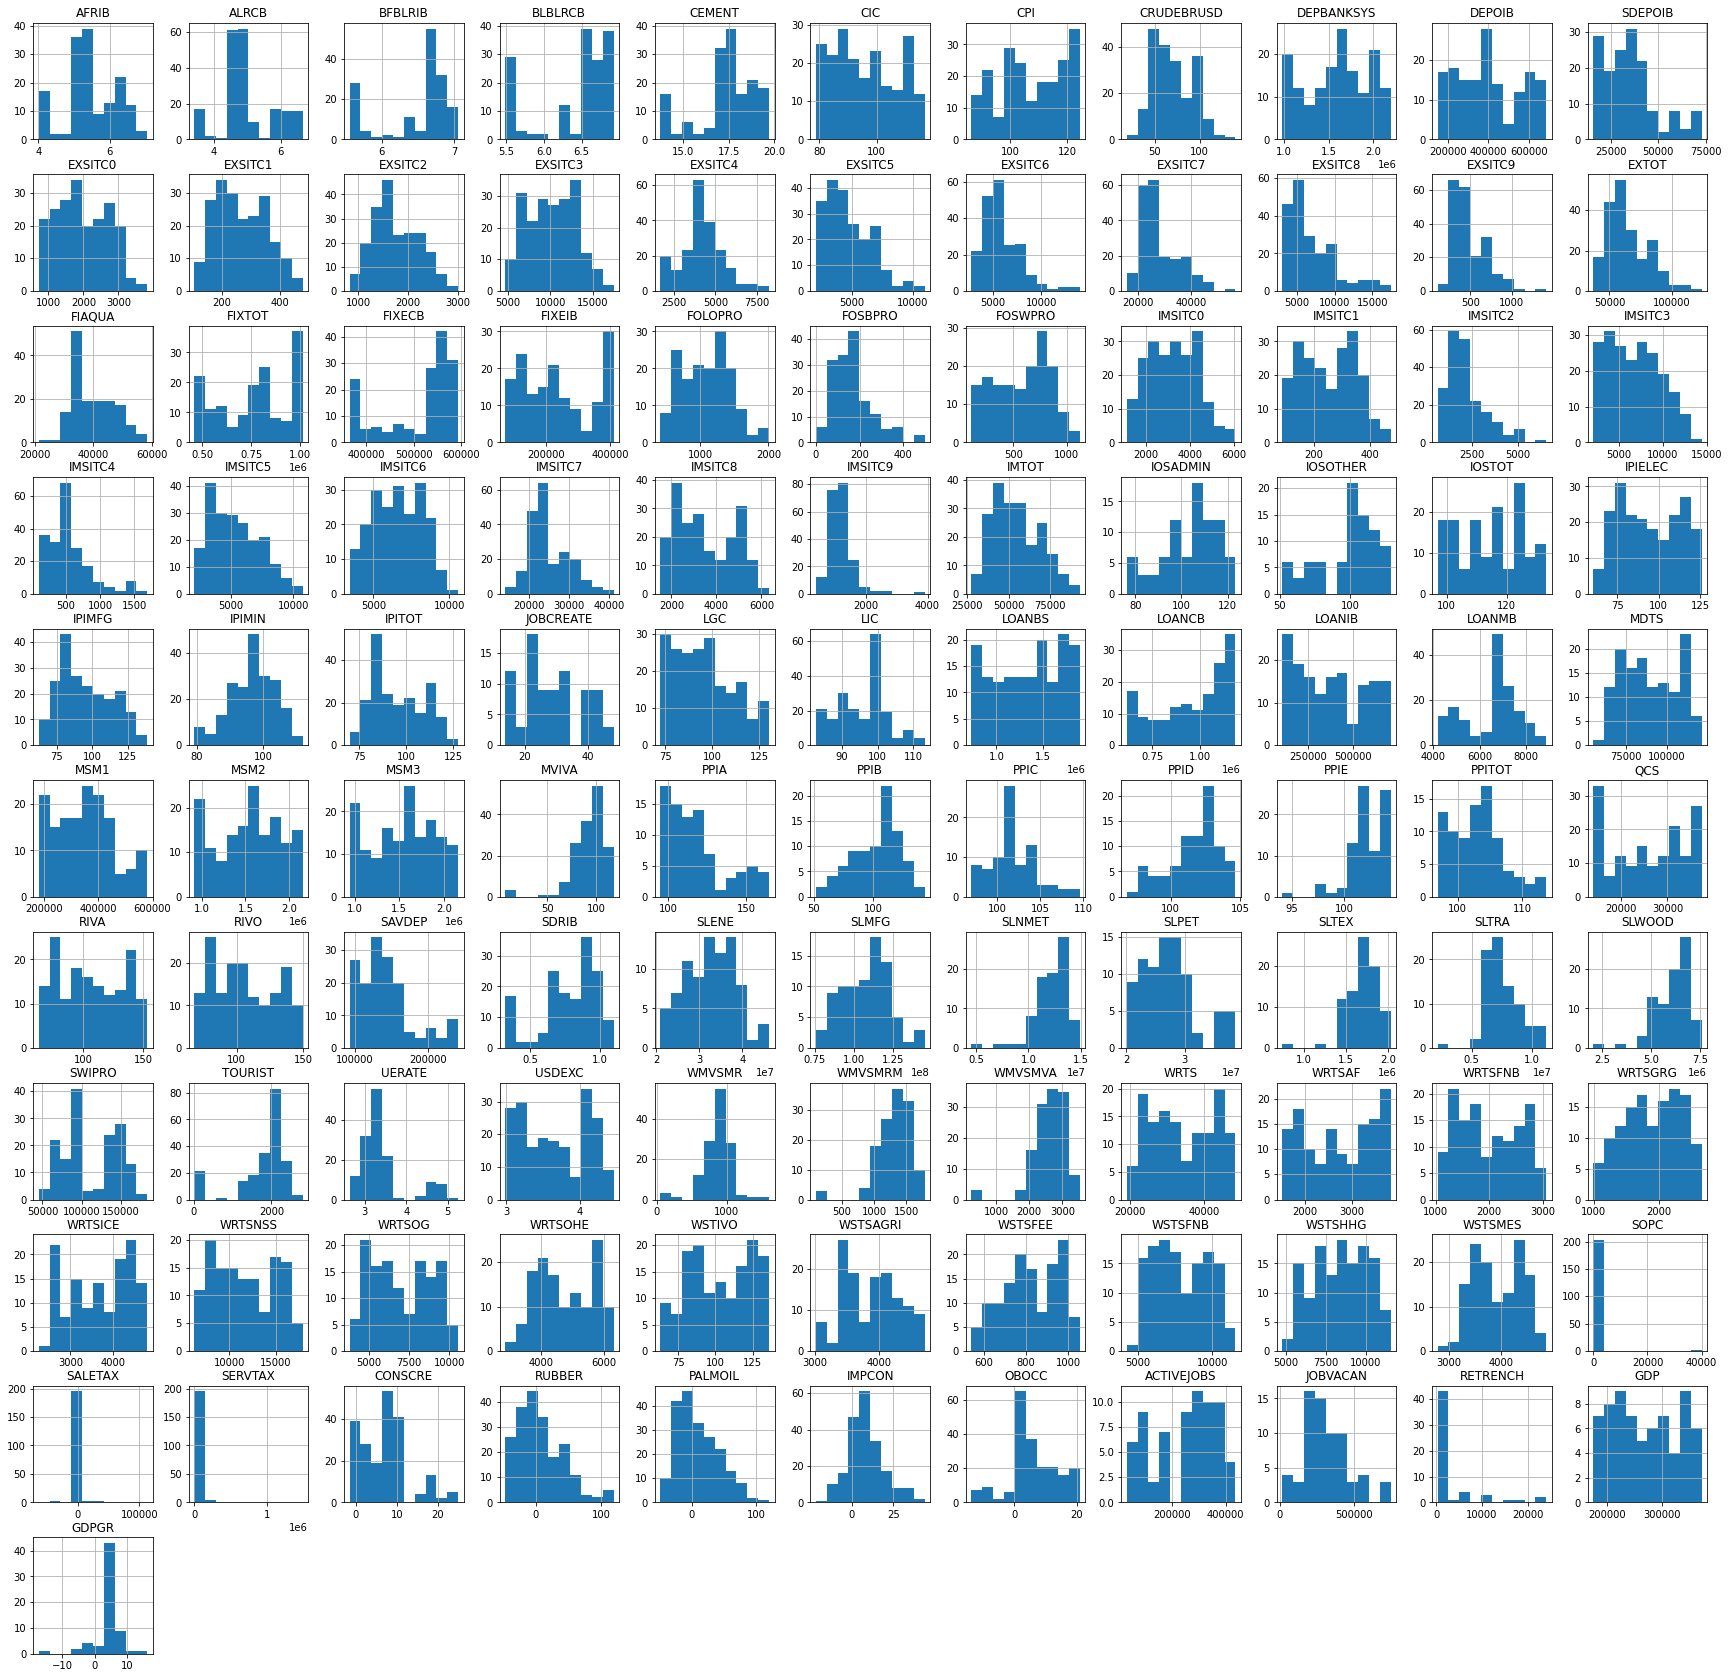

In [5]:
# Histogram of all numeric fields
df_hist = df.drop(columns=['DATE'],axis=1)
df_hist.hist(figsize=(30,30));

In [6]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,2], name = data.iloc[:,2].name, line = dict(color = '#FF0000'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,3], name = data.iloc[:,3].name, line = dict(color = '#CD853F'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,4], name = data.iloc[:,4].name, line = dict(color = '#483D8B'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,5], name = data.iloc[:,5].name, line = dict(color = '#00008B'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,6], name = data.iloc[:,6].name, line = dict(color = '#8B4513'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,7], name = data.iloc[:,7].name, line = dict(color = '#7B68EE'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,8], name = data.iloc[:,8].name, line = dict(color = '#800080'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,9], name = data.iloc[:,9].name, line = dict(color = '#87CEEB'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,10], name = data.iloc[:,10].name, line = dict(color = '#FFDAB9'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,11], name = data.iloc[:,11].name, line = dict(color = '#32CD32'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,12], name = data.iloc[:,12].name, line = dict(color = '#D8BFD8'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,13], name = data.iloc[:,13].name, line = dict(color = '#DDA0DD'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,14], name = data.iloc[:,14].name, line = dict(color = '#6495ED'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,15], name = data.iloc[:,15].name, line = dict(color = '#FFA07A'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,16], name = data.iloc[:,16].name, line = dict(color = '#4682B4'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,17], name = data.iloc[:,17].name, line = dict(color = '#556B2F'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,18], name = data.iloc[:,18].name, line = dict(color = '#9ACD32'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,19], name = data.iloc[:,19].name, line = dict(color = '#B0C4DE'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,20], name = data.iloc[:,20].name, line = dict(color = '#9370DB'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,21], name = data.iloc[:,21].name, line = dict(color = '#DAA520'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,22], name = data.iloc[:,22].name, line = dict(color = '#0000CD'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,23], name = data.iloc[:,23].name, line = dict(color = '#008080'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,24], name = data.iloc[:,24].name, line = dict(color = '#B8860B'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,25], name = data.iloc[:,25].name, line = dict(color = '#FFD700'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,26], name = data.iloc[:,26].name, line = dict(color = '#800000'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,27], name = data.iloc[:,27].name, line = dict(color = '#FF8C00'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,28], name = data.iloc[:,28].name, line = dict(color = '#B0E0E6'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,29], name = data.iloc[:,29].name, line = dict(color = '#FF00FF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,30], name = data.iloc[:,30].name, line = dict(color = '#F4A460'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,31], name = data.iloc[:,31].name, line = dict(color = '#FFFF00'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,32], name = data.iloc[:,32].name, line = dict(color = '#D2691E'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,33], name = data.iloc[:,33].name, line = dict(color = '#7FFFD4'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,34], name = data.iloc[:,34].name, line = dict(color = '#0000FF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,35], name = data.iloc[:,35].name, line = dict(color = '#FFEFD5'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,36], name = data.iloc[:,36].name, line = dict(color = '#EEE8AA'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,37], name = data.iloc[:,37].name, line = dict(color = '#FFA500'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,38], name = data.iloc[:,38].name, line = dict(color = '#9400D3'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,39], name = data.iloc[:,39].name, line = dict(color = '#FFDEAD'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,40], name = data.iloc[:,40].name, line = dict(color = '#66CDAA'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,41], name = data.iloc[:,41].name, line = dict(color = '#8B008B'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,42], name = data.iloc[:,42].name, line = dict(color = '#D2B48C'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,43], name = data.iloc[:,43].name, line = dict(color = '#ADFF2F'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,44], name = data.iloc[:,44].name, line = dict(color = '#008000'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,45], name = data.iloc[:,45].name, line = dict(color = '#F5DEB3'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,46], name = data.iloc[:,46].name, line = dict(color = '#8FBC8F'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,47], name = data.iloc[:,47].name, line = dict(color = '#DEB887'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,48], name = data.iloc[:,48].name, line = dict(color = '#FF00FF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,49], name = data.iloc[:,49].name, line = dict(color = '#BDB76B'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,50], name = data.iloc[:,50].name, line = dict(color = '#9932CC'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,51], name = data.iloc[:,51].name, line = dict(color = '#87CEFA'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,52], name = data.iloc[:,52].name, line = dict(color = '#00FF00'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,53], name = data.iloc[:,53].name, line = dict(color = '#B22222'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,54], name = data.iloc[:,54].name, line = dict(color = '#E9967A'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,55], name = data.iloc[:,55].name, line = dict(color = '#E0FFFF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,56], name = data.iloc[:,56].name, line = dict(color = '#6A5ACD'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,57], name = data.iloc[:,57].name, line = dict(color = '#FFE4B5'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,58], name = data.iloc[:,58].name, line = dict(color = '#FA8072'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,59], name = data.iloc[:,59].name, line = dict(color = '#4169E1'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,60], name = data.iloc[:,60].name, line = dict(color = '#E6E6FA'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,61], name = data.iloc[:,61].name, line = dict(color = '#1E90FF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,62], name = data.iloc[:,62].name, line = dict(color = '#DA70D6'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,63], name = data.iloc[:,63].name, line = dict(color = '#F08080'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,64], name = data.iloc[:,64].name, line = dict(color = '#BC8F8F'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,65], name = data.iloc[:,65].name, line = dict(color = '#FF6347'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,66], name = data.iloc[:,66].name, line = dict(color = '#ADD8E6'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,67], name = data.iloc[:,67].name, line = dict(color = '#8B0000'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,68], name = data.iloc[:,68].name, line = dict(color = '#FFC0CB'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,69], name = data.iloc[:,69].name, line = dict(color = '#808000'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,70], name = data.iloc[:,70].name, line = dict(color = '#00FFFF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,71], name = data.iloc[:,71].name, line = dict(color = '#C71585'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,72], name = data.iloc[:,72].name, line = dict(color = '#A0522D'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,73], name = data.iloc[:,73].name, line = dict(color = '#FF69B4'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,74], name = data.iloc[:,74].name, line = dict(color = '#00FF7F'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,75], name = data.iloc[:,75].name, line = dict(color = '#BA55D3'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,76], name = data.iloc[:,76].name, line = dict(color = '#000080'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,77], name = data.iloc[:,77].name, line = dict(color = '#00FFFF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,78], name = data.iloc[:,78].name, line = dict(color = '#FF1493'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,79], name = data.iloc[:,79].name, line = dict(color = '#5F9EA0'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,80], name = data.iloc[:,80].name, line = dict(color = '#663399'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,81], name = data.iloc[:,81].name, line = dict(color = '#FAFAD2'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,82], name = data.iloc[:,82].name, line = dict(color = '#228B22'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,83], name = data.iloc[:,83].name, line = dict(color = '#8A2BE2'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,84], name = data.iloc[:,84].name, line = dict(color = '#00CED1'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,85], name = data.iloc[:,85].name, line = dict(color = '#EE82EE'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,86], name = data.iloc[:,86].name, line = dict(color = '#FF4500'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,87], name = data.iloc[:,87].name, line = dict(color = '#4B0082'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,88], name = data.iloc[:,88].name, line = dict(color = '#DB7093'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,89], name = data.iloc[:,89].name, line = dict(color = '#CD5C5C'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,90], name = data.iloc[:,90].name, line = dict(color = '#20B2AA'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,91], name = data.iloc[:,91].name, line = dict(color = '#F0E68C'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,92], name = data.iloc[:,92].name, line = dict(color = '#6B8E23'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,93], name = data.iloc[:,93].name, line = dict(color = '#FF7F50'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,94], name = data.iloc[:,94].name, line = dict(color = '#3CB371'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,95], name = data.iloc[:,95].name, line = dict(color = '#FFFACD'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,96], name = data.iloc[:,96].name, line = dict(color = '#98FB98'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,97], name = data.iloc[:,97].name, line = dict(color = '#FFE4C4'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,98], name = data.iloc[:,98].name, line = dict(color = '#FFFFE0'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,99], name = data.iloc[:,99].name, line = dict(color = '#A52A2A'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,100], name = data.iloc[:,100].name, line = dict(color = '#48D1CC'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,101], name = data.iloc[:,101].name, line = dict(color = '#2E8B57'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,102], name = data.iloc[:,102].name, line = dict(color = '#7CFC00'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,103], name = data.iloc[:,103].name, line = dict(color = '#40E0D0'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,104], name = data.iloc[:,104].name, line = dict(color = '#DC143C'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,105], name = data.iloc[:,105].name, line = dict(color = '#90EE90'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,106], name = data.iloc[:,106].name, line = dict(color = '#7FFF00'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,107], name = data.iloc[:,107].name, line = dict(color = '#FFB6C1'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,108], name = data.iloc[:,108].name, line = dict(color = '#00BFFF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,109], name = data.iloc[:,109].name, line = dict(color = '#191970'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,110], name = data.iloc[:,110].name, line = dict(color = '#AFEEEE'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,111], name = data.iloc[:,111].name, line = dict(color = '#000000'), opacity = 1.0))
#fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,112], name = data.iloc[:,112].name, line = dict(color = '#000000'), opacity = 0.8))


In [7]:
# Understanding the numeric fields
quality=df.describe()
quality

,AFRIB,ALRCB,BFBLRIB,BLBLRCB,CEMENT,CIC,CPI,CRUDEBRUSD,DEPBANKSYS,DEPOIB,...,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDP,GDPGR
count,155.000000,203.000000,154.000000,155.000000,156.000000,202.000000,204.000000,204.000000,1.550000e+02,155.000000,...,204.000000,204.000000,204.000000,204.000000,204.000000,68.000000,68.000000,55.000000,68.000000,64.000000
mean,5.472695,4.998805,6.469703,6.388161,17.385961,96.024752,107.404947,70.333676,1.598044e+06,399617.937731,...,7.124570,7.349349,10.394490,8.500809,6.130966,251041.205882,315972.911765,3280.127273,269203.505250,4.155204
std,0.726705,0.805723,0.493392,0.483260,1.584209,10.985684,11.346757,22.023247,3.480040e+05,158223.014280,...,5.683265,34.144618,32.147622,11.000693,7.704548,115073.759834,154971.314586,5326.962581,58304.500725,4.304228
min,4.005200,3.399600,5.554400,5.489583,13.750000,78.800000,86.500000,18.840000,9.765301e+05,147693.725000,...,-1.568345,-47.038184,-48.444257,-21.711202,-13.729302,33740.000000,15369.000000,321.000000,175761.076500,-17.109661
25%,5.147550,4.583550,6.320000,6.270000,16.867500,86.825000,98.675000,52.657500,1.337980e+06,270340.003000,...,2.569235,-18.675305,-14.740488,1.709359,2.169807,153923.250000,220856.250000,690.000000,217306.332675,4.425503
50%,5.310829,4.849500,6.620000,6.533333,17.650933,95.350000,106.800000,66.475000,1.666441e+06,394825.460900,...,7.068267,0.768251,3.443725,7.558426,4.874904,276545.500000,292497.000000,993.000000,265792.895850,5.002724
75%,6.100000,5.202050,6.865291,6.748062,18.497500,106.300000,119.450000,88.835000,1.890833e+06,539756.970400,...,9.439562,27.869786,34.064529,14.204414,11.462061,348129.000000,406285.250000,2095.000000,323543.812300,5.715734
max,7.050000,6.670000,7.055000,6.922083,19.710000,116.700000,124.509198,140.000000,2.200446e+06,686743.046300,...,24.922345,118.554375,120.443587,43.837740,21.069221,436012.000000,748907.000000,24111.000000,370672.200000,16.100000


### **Missing Values**

In [8]:
# Total missing values for each feature
df.isnull().sum().sort_values(ascending=False)/len(df)

RETRENCH      0.730392
GDPGR         0.686275
GDP           0.666667
JOBVACAN      0.666667
ACTIVEJOBS    0.666667
                ...   
EXSITC8       0.000000
IMSITC8       0.000000
EXSITC6       0.000000
EXSITC5       0.000000
DATE          0.000000
Length: 112, dtype: float64

In [9]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
mis_val= missing_values_table(df)
mis_val

Your selected dataframe has 112 columns.
There are 74 columns that have missing values.


,Missing Values,% of Total Values
RETRENCH,149,73.0
GDPGR,140,68.6
GDP,136,66.7
JOBVACAN,136,66.7
ACTIVEJOBS,136,66.7
...,...,...
LGC,2,1.0
USDEXC,2,1.0
CIC,2,1.0
LIC,2,1.0


In [11]:
from google.colab import files
mis_val.to_csv('missing_val.csv') 
files.download('missing_val.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Delete columns containing either 10% or more than 10% NaN Values
perc = 10.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, 
                thresh=min_count)

In [13]:
mod_df.shape

(204, 43)

In [14]:
# Add a Quarterly variables back to DataFrame
#mod_df = pd.concat([mod_df, pd.DataFrame(columns = ['ACTIVEJOBS','JOBVACAN','RETRENCH','GDPGR'])])
q = df['ACTIVEJOBS']
q1 = df['JOBVACAN']
q2 = df['RETRENCH']
q3 = df['GDPGR']
mod_df = mod_df.join(q)
mod_df = mod_df.join(q1)
mod_df = mod_df.join(q2)
mod_df = mod_df.join(q3)

In [15]:
mod_df

,DATE,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
0,2005-01-01,5.9800,78.8,86.500000,48.20,788.861275,150.089998,1048.181046,5309.253984,1977.781692,...,-91.347676,16.586150,-1.202379,-25.209614,13.770724,17.021932,NaN,NaN,NaN,NaN
1,2005-02-01,5.9500,79.2,86.600000,51.75,721.091699,105.104960,916.562834,4819.221845,1696.436111,...,124.245916,17.012425,0.496053,-30.095037,13.311949,18.740244,NaN,NaN,NaN,NaN
2,2005-03-01,5.9000,79.7,86.600000,55.40,936.103843,134.578062,1209.154040,6103.839315,2247.228259,...,41.275279,17.425686,-3.872908,-28.635682,7.266388,18.691811,33740.0,15369.0,734.0,NaN
3,2005-04-01,5.9700,79.4,86.800000,49.72,843.887467,157.084688,1185.318329,5898.350316,1999.962327,...,-4.860056,16.898292,-5.918167,-27.502528,-2.279316,19.450792,NaN,NaN,NaN,NaN
4,2005-05-01,5.9400,79.0,87.500000,51.97,862.581569,128.087299,1092.293109,5420.482805,2308.730344,...,24.088199,17.701599,-4.258431,-24.546425,10.795153,18.779487,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2021-08-01,3.3996,108.2,122.509050,68.50,3245.358769,203.112580,2616.117441,12902.375770,5828.147369,...,-23.199455,-0.786578,32.954645,61.811723,-0.694866,-11.111890,NaN,NaN,NaN,NaN
200,2021-09-01,3.4502,112.4,122.809072,75.03,3244.556295,187.562696,2809.531852,13894.971500,7997.005001,...,-16.142360,-1.568345,19.640346,55.813953,3.684461,-8.858620,59557.0,600970.0,10206.0,-4.5
201,2021-10-01,3.4178,113.3,123.709139,83.57,3477.248304,213.356770,2628.245222,14807.908030,7568.202882,...,2.235317,-0.735518,13.776644,69.525088,10.846974,-3.292850,NaN,NaN,NaN,NaN
202,2021-11-01,3.4378,NaN,124.009161,66.18,3607.351780,230.979336,2503.648658,15065.181200,8222.179619,...,16.925257,0.149354,13.863028,56.078317,22.770575,-0.851295,NaN,NaN,NaN,NaN


In [16]:
from google.colab import files
mod_df.to_csv('GDP_S1.csv') 
files.download('GDP_S1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
df_2 = mod_df.copy()

### **Missing Values - MICE**

In [18]:
#MICE
import numpy as np 
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_3 = df_2.drop(['DATE'],axis=1)

imputer=IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42,n_nearest_features=5)
imputer
imputed_dataset = imputer.fit_transform(df_3)

df_3 = pd.DataFrame(imputed_dataset, columns = ['ALRCB','CIC','CPI','CRUDEBRUSD','EXSITC0','EXSITC1','EXSITC2','EXSITC3','EXSITC4','EXSITC5','EXSITC6','EXSITC7','EXSITC8','EXSITC9','EXTOT','IMSITC0','IMSITC1','IMSITC2','IMSITC3','IMSITC4','IMSITC5','IMSITC6','IMSITC7','IMSITC8','IMSITC9','IMTOT','IPIELEC','IPIMFG','IPIMIN','IPITOT','LGC','LIC','TOURIST','USDEXC','SOPC','SALETAX','SERVTAX','CONSCRE','RUBBER','PALMOIL','IMPCON','OBOCC','ACTIVEJOBS','JOBVACAN','RETRENCH','GDPGR'])

print(df_3)
print(type(df_3))

df_3.head()

        ALRCB         CIC         CPI  CRUDEBRUSD      EXSITC0     EXSITC1  \
0    5.980000   78.800000   86.500000       48.20   788.861275  150.089998   
1    5.950000   79.200000   86.600000       51.75   721.091699  105.104960   
2    5.900000   79.700000   86.600000       55.40   936.103843  134.578062   
3    5.970000   79.400000   86.800000       49.72   843.887467  157.084688   
4    5.940000   79.000000   87.500000       51.97   862.581569  128.087299   
..        ...         ...         ...         ...          ...         ...   
199  3.399600  108.200000  122.509050       68.50  3245.358769  203.112580   
200  3.450200  112.400000  122.809072       75.03  3244.556295  187.562696   
201  3.417800  113.300000  123.709139       83.57  3477.248304  213.356770   
202  3.437800  125.885263  124.009161       66.18  3607.351780  230.979336   
203  3.604075  133.141596  124.509198       75.21  3824.966136  288.860111   

         EXSITC2       EXSITC3      EXSITC4       EXSITC5  ... 

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,EXSITC5,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
0,5.98,78.8,86.5,48.20,788.861275,150.089998,1048.181046,5309.253984,1977.781692,2414.038394,...,-91.347676,16.586150,-1.202379,-25.209614,13.770724,17.021932,195623.049166,294407.984258,-296.563372,6.995966
1,5.95,79.2,86.6,51.75,721.091699,105.104960,916.562834,4819.221845,1696.436111,2444.808902,...,124.245916,17.012425,0.496053,-30.095037,13.311949,18.740244,148684.538789,277341.713153,-1102.467637,7.382329
2,5.90,79.7,86.6,55.40,936.103843,134.578062,1209.154040,6103.839315,2247.228259,2902.855983,...,41.275279,17.425686,-3.872908,-28.635682,7.266388,18.691811,33740.000000,15369.000000,734.000000,5.124904
3,5.97,79.4,86.8,49.72,843.887467,157.084688,1185.318329,5898.350316,1999.962327,2749.274618,...,-4.860056,16.898292,-5.918167,-27.502528,-2.279316,19.450792,201937.496122,297133.331818,91.837451,6.764701
4,5.94,79.0,87.5,51.97,862.581569,128.087299,1092.293109,5420.482805,2308.730344,2476.513782,...,24.088199,17.701599,-4.258431,-24.546425,10.795153,18.779487,152931.459937,279469.727866,-1681.705265,7.149748


In [19]:
df_3.isnull().sum()

ALRCB         0
CIC           0
CPI           0
CRUDEBRUSD    0
EXSITC0       0
EXSITC1       0
EXSITC2       0
EXSITC3       0
EXSITC4       0
EXSITC5       0
EXSITC6       0
EXSITC7       0
EXSITC8       0
EXSITC9       0
EXTOT         0
IMSITC0       0
IMSITC1       0
IMSITC2       0
IMSITC3       0
IMSITC4       0
IMSITC5       0
IMSITC6       0
IMSITC7       0
IMSITC8       0
IMSITC9       0
IMTOT         0
IPIELEC       0
IPIMFG        0
IPIMIN        0
IPITOT        0
LGC           0
LIC           0
TOURIST       0
USDEXC        0
SOPC          0
SALETAX       0
SERVTAX       0
CONSCRE       0
RUBBER        0
PALMOIL       0
IMPCON        0
OBOCC         0
ACTIVEJOBS    0
JOBVACAN      0
RETRENCH      0
GDPGR         0
dtype: int64

In [20]:
#Adding back GDPGR column
#numbers = df2["Numbers"]
#df1 = df1.join(numbers)

date = df['DATE']
df_3 = df_3.join(date)

In [21]:
df_3.head()

,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,EXSITC5,...,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR,DATE
0,5.98,78.8,86.5,48.20,788.861275,150.089998,1048.181046,5309.253984,1977.781692,2414.038394,...,16.586150,-1.202379,-25.209614,13.770724,17.021932,195623.049166,294407.984258,-296.563372,6.995966,2005-01-01
1,5.95,79.2,86.6,51.75,721.091699,105.104960,916.562834,4819.221845,1696.436111,2444.808902,...,17.012425,0.496053,-30.095037,13.311949,18.740244,148684.538789,277341.713153,-1102.467637,7.382329,2005-02-01
2,5.90,79.7,86.6,55.40,936.103843,134.578062,1209.154040,6103.839315,2247.228259,2902.855983,...,17.425686,-3.872908,-28.635682,7.266388,18.691811,33740.000000,15369.000000,734.000000,5.124904,2005-03-01
3,5.97,79.4,86.8,49.72,843.887467,157.084688,1185.318329,5898.350316,1999.962327,2749.274618,...,16.898292,-5.918167,-27.502528,-2.279316,19.450792,201937.496122,297133.331818,91.837451,6.764701,2005-04-01
4,5.94,79.0,87.5,51.97,862.581569,128.087299,1092.293109,5420.482805,2308.730344,2476.513782,...,17.701599,-4.258431,-24.546425,10.795153,18.779487,152931.459937,279469.727866,-1681.705265,7.149748,2005-05-01


In [22]:
from google.colab import files
df_3.to_csv('gdp_MICE.csv') 
files.download('gdp_MICE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Imputation -  nowcast_lstm**

In [ ]:
!pip install nowcast_lstm
!pip install dill numpy pandas pmdarima

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dill # for loading and saving a trained model
from nowcast_lstm.LSTM import LSTM
from nowcast_lstm.model_selection import variable_selection, hyperparameter_tuning, select_model

import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving GDP_S1 (1).csv to GDP_S1 (1).csv


In [ ]:
# data setup
#import io
data = pd.read_csv(io.BytesIO(data_to_load['GDP_S1 (1).csv']),parse_dates=["DATE"])
variables = ['ALRCB','CIC','CPI','CRUDEBRUSD','EXSITC0','EXSITC1','EXSITC2','EXSITC3','EXSITC4','EXSITC5','EXSITC6','EXSITC7','EXSITC8','EXSITC9','EXTOT','IMSITC0','IMSITC1','IMSITC2','IMSITC3','IMSITC4','IMSITC5','IMSITC6','IMSITC7','IMSITC8','IMSITC9','IMTOT','IPIELEC','IPIMFG','IPIMIN','IPITOT','LGC','LIC','TOURIST','USDEXC','SOPC','SALETAX','SERVTAX','CONSCRE','RUBBER','PALMOIL','IMPCON','OBOCC','ACTIVEJOBS','JOBVACAN','RETRENCH']
target = ['GDPGR']

data.head()


,Unnamed: 0,DATE,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
0,0,2005-01-01,5.98,78.8,86.5,48.20,788.861275,150.089998,1048.181046,5309.253984,...,-91.347676,16.586150,-1.202379,-25.209614,13.770724,17.021932,NaN,NaN,NaN,NaN
1,1,2005-02-01,5.95,79.2,86.6,51.75,721.091699,105.104960,916.562834,4819.221845,...,124.245916,17.012425,0.496053,-30.095037,13.311949,18.740244,NaN,NaN,NaN,NaN
2,2,2005-03-01,5.90,79.7,86.6,55.40,936.103843,134.578062,1209.154040,6103.839315,...,41.275279,17.425686,-3.872908,-28.635682,7.266388,18.691811,33740.0,15369.0,734.0,NaN
3,3,2005-04-01,5.97,79.4,86.8,49.72,843.887467,157.084688,1185.318329,5898.350316,...,-4.860056,16.898292,-5.918167,-27.502528,-2.279316,19.450792,NaN,NaN,NaN,NaN
4,4,2005-05-01,5.94,79.0,87.5,51.97,862.581569,128.087299,1092.293109,5420.482805,...,24.088199,17.701599,-4.258431,-24.546425,10.795153,18.779487,NaN,NaN,NaN,NaN


In [ ]:
#fill these using the mean of the series.a quarterly variable, has additionally had its within-series missings filled with the series mean as well
#tmp = LSTM(data,'GDPGR', n_timesteps=12, fill_na_func=np.nanmean).dataset["na_filled_dataset"][-10:,:-1] # pass fill_na_func=np.nanmedian to use the median
tmp = LSTM(df_2,'GDPGR', n_timesteps=12, fill_na_func=np.nanmean).dataset["na_filled_dataset"][:,:-1]
new2=pd.DataFrame(tmp, columns=variables)

In [ ]:
#ragged edge problem arises with differences in publication lags among the variables. 
# ragged edges can also be filled by ARMA estimation, in the below example ARMA parameters were estimated using `pmdarima.arima.auto_arima` then fit to the data to fill ragged edges
# ragged edges have now been filled using ARMA models for each series. x_vol_world2 within-series missings continue to be filled in with the series mean as passed to the `fill_na_func`

tmp_2 = LSTM(df_2, "GDPGR", n_timesteps=12, fill_na_func=np.nanmean, fill_ragged_edges_func="ARMA").dataset["na_filled_dataset"][:,:-1]
new3=pd.DataFrame(tmp_2, columns=variables)

In [ ]:
#Adding back GDPGR column
#numbers = df2["Numbers"]
#df1 = df1.join(numbers)

gdp = df_3['GDPGR']
new3 = new3.join(gdp)

In [ ]:
from google.colab import files
new3.to_csv('GDP_LSTM-ARMA.csv') 
files.download('GDP_LSTM-ARMA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Adding back GDPGR column
#numbers = df2["Numbers"]
#df1 = df1.join(numbers)

gdp = df_3['GDPGR']
new2 = new2.join(gdp)

In [ ]:
from google.colab import files
new2.to_csv('GDP_LSTM-MEAN.csv') 
files.download('GDP_LSTM-MEAN.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Diagnostic Statistics**

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving GDP_LSTM-ARMA.csv to GDP_LSTM-ARMA.csv


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# data setup
import io
df_ar = pd.read_csv(io.BytesIO(data_to_load['GDP_LSTM-ARMA.csv']),parse_dates=["DATE"])
df_ar.head()

,DATE,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
0,2005-01-01,5.98,78.8,86.5,48.20,788.861275,150.089998,1048.181046,5309.253984,1977.781692,...,-91.347676,16.586150,-1.202379,-25.209614,13.770724,17.021932,251041.2059,315972.9118,3280.127273,6.995966
1,2005-02-01,5.95,79.2,86.6,51.75,721.091699,105.104960,916.562834,4819.221845,1696.436111,...,124.245916,17.012425,0.496053,-30.095037,13.311949,18.740244,251041.2059,315972.9118,3280.127273,7.382329
2,2005-03-01,5.90,79.7,86.6,55.40,936.103843,134.578062,1209.154040,6103.839315,2247.228259,...,41.275279,17.425686,-3.872908,-28.635682,7.266388,18.691811,33740.0000,15369.0000,734.000000,5.124904
3,2005-04-01,5.97,79.4,86.8,49.72,843.887467,157.084688,1185.318329,5898.350316,1999.962327,...,-4.860056,16.898292,-5.918167,-27.502528,-2.279316,19.450792,251041.2059,315972.9118,3280.127273,6.764701
4,2005-05-01,5.94,79.0,87.5,51.97,862.581569,128.087299,1092.293109,5420.482805,2308.730344,...,24.088199,17.701599,-4.258431,-24.546425,10.795153,18.779487,251041.2059,315972.9118,3280.127273,7.149748


In [ ]:
# creating features and label variable
X = df_ar[['ALRCB','CIC','CPI','CRUDEBRUSD','EXSITC0','EXSITC1','EXSITC2','EXSITC3','EXSITC4','EXSITC5','EXSITC6','EXSITC7','EXSITC8','EXSITC9','EXTOT','IMSITC0','IMSITC1','IMSITC2','IMSITC3','IMSITC4','IMSITC5','IMSITC6','IMSITC7','IMSITC8','IMSITC9','IMTOT','IPIELEC','IPIMFG','IPIMIN','IPITOT','LGC','LIC','TOURIST','USDEXC','SOPC','SALETAX','SERVTAX','CONSCRE','RUBBER','PALMOIL','IMPCON','OBOCC','ACTIVEJOBS','JOBVACAN','RETRENCH']]
y = df_ar[["GDPGR"]]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.22215642e+00, -1.57779935e+00, -1.84690416e+00, ...,
         8.91978475e-11,  1.32466849e-10,  2.68288860e-11],
       [ 1.18507675e+00, -1.54148539e+00, -1.83806938e+00, ...,
         8.91978475e-11,  1.32466849e-10,  2.68288860e-11],
       [ 1.12327730e+00, -1.49609294e+00, -1.83806938e+00, ...,
        -3.29506143e+00, -3.38470633e+00, -9.29006316e-01],
       ...,
       [-1.94469457e+00,  1.55427994e+00,  1.44043802e+00, ...,
         8.91978475e-11,  1.32466849e-10,  2.68288860e-11],
       [-1.91997479e+00,  1.44969981e+00,  1.46694430e+00, ...,
         8.91978475e-11,  1.32466849e-10,  2.68288860e-11],
       [-1.91029593e+00,  1.38876348e+00,  1.51112141e+00, ...,
        -2.72557850e+00,  4.87470286e+00,  1.26824285e+00]])

In [ ]:
# checking for multicollinearity using `VIF` and `correlation matrix`

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns

vif

,VIF,Features
0,2.343860e+01,ALRCB
1,1.346712e+02,CIC
2,1.396493e+02,CPI
3,8.705846e+00,CRUDEBRUSD
4,9.007199e+14,EXSITC0
5,1.215546e+13,EXSITC1
6,3.464307e+14,EXSITC2
7,9.007199e+15,EXSITC3
8,3.002400e+15,EXSITC4
9,4.503600e+15,EXSITC5


In [ ]:
from google.colab import files
vif.to_csv('vif-lstm-arma.csv') 
files.download('vif-lstm-arma.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Checking Heteroscedasticity
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd

x = new3[['ALRCB','CIC','CPI','CRUDEBRUSD','EXSITC0','EXSITC1','EXSITC2','EXSITC3','EXSITC4','EXSITC5','EXSITC6','EXSITC7','EXSITC8','EXSITC9','EXTOT','IMSITC0','IMSITC1','IMSITC2','IMSITC3','IMSITC4','IMSITC5','IMSITC6','IMSITC7','IMSITC8','IMSITC9','IMTOT','IPIELEC','IPIMFG','IPIMIN','IPITOT','LGC','LIC','TOURIST','USDEXC','SOPC','SALETAX','SERVTAX','CONSCRE','RUBBER','PALMOIL','IMPCON','OBOCC','ACTIVEJOBS','JOBVACAN','RETRENCH']]
y = new3[["GDPGR"]]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': nan, 'Test Statistic p-value': nan, 'F-Statistic': nan, 'F-Test p-value': nan}


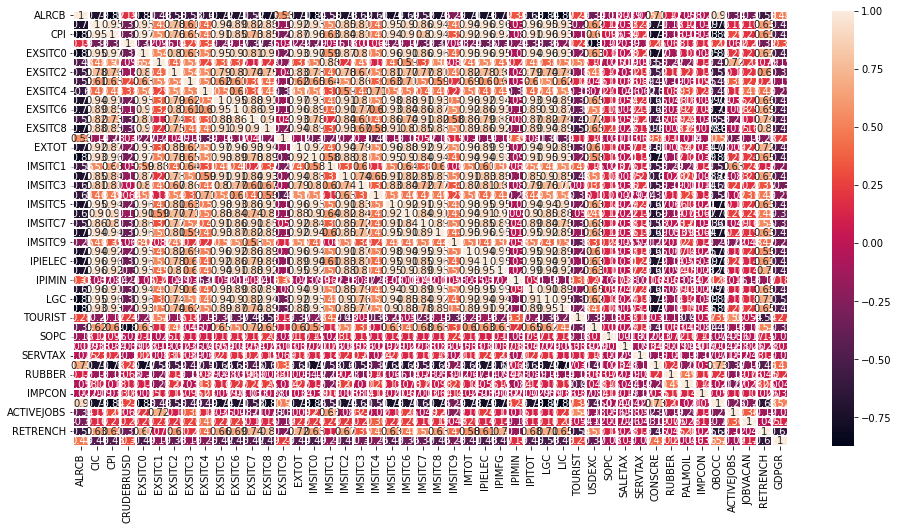

In [ ]:
# Heatmap

fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df_3.corr(), annot = True, annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [ ]:
#correlation analysis
corr = df_3.corr()
corr.head()

,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,EXSITC5,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
ALRCB,1.000000,-0.715188,-0.816599,0.186724,-0.805635,-0.475618,-0.582706,-0.530917,-0.604662,-0.721099,...,-0.024566,0.706085,0.120017,-0.058499,-0.021848,0.904966,-0.343165,-0.302476,-0.583674,0.475352
CIC,-0.715188,1.000000,0.950543,-0.328968,0.948201,0.481867,0.778156,0.611657,0.421794,0.940809,...,0.232164,-0.710330,-0.132605,0.121661,-0.019478,-0.747961,0.149568,0.160002,0.629777,-0.455820
CPI,-0.816599,0.950543,1.000000,-0.328017,0.967123,0.570326,0.756207,0.652745,0.477777,0.913575,...,0.203411,-0.783442,-0.160614,0.018472,-0.032677,-0.844778,0.292485,0.206290,0.605992,-0.478997
CRUDEBRUSD,0.186724,-0.328968,-0.328017,1.000000,-0.323961,-0.095887,-0.140636,0.290924,0.327298,-0.288313,...,-0.101690,0.258390,0.067981,0.132732,0.159794,0.273919,0.062426,0.197840,-0.322527,0.301491
EXSITC0,-0.805635,0.948201,0.967123,-0.323961,1.000000,0.540625,0.796612,0.628175,0.540174,0.945158,...,0.198180,-0.773895,-0.101555,0.113637,0.003508,-0.829932,0.215611,0.207673,0.670981,-0.492673


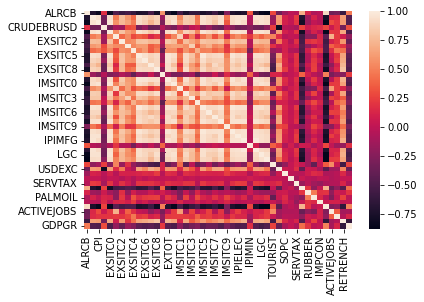

In [ ]:
sns.heatmap(df_3.corr());

In [ ]:
from google.colab import files
corr.to_csv('corr.csv') 
files.download('corr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Function to check stationarity

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
# Data Prep

AI_Model_data = pd.concat([y, X], axis=1, sort=False)
#AI_Model_data = AI_Model_data.dropna()
# Check stationarity

# ADF Test on each column
for name, column in AI_Model_data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GDPGR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.72
 No. Lags Chosen       = 14
 Critical value 1%     = -3.465
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.8415. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALRCB" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5177
 No. Lags Chosen       = 2
 Critical value 1%     = -3.463
 Critical value 5%     = -2.876
 Critical value 10%    = -2.574
 => P-Value = 0.8885. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CIC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit ro

### **Feature Selection**

In [ ]:
predictors = df_3[['ALRCB','CIC','CPI','CRUDEBRUSD','EXSITC0','EXSITC1','EXSITC2','EXSITC3','EXSITC4','EXSITC5','EXSITC6','EXSITC7','EXSITC8','EXSITC9','EXTOT','IMSITC0','IMSITC1','IMSITC2','IMSITC3','IMSITC4','IMSITC5','IMSITC6','IMSITC7','IMSITC8','IMSITC9','IMTOT','IPIELEC','IPIMFG','IPIMIN','IPITOT','LGC','LIC','TOURIST','USDEXC','SOPC','SALETAX','SERVTAX','CONSCRE','RUBBER','PALMOIL','IMPCON','OBOCC','ACTIVEJOBS','JOBVACAN','RETRENCH']]
Target = df_3[["GDPGR"]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


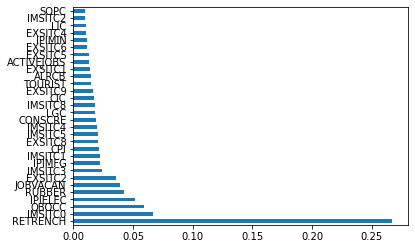

In [ ]:
#1.Select the top n features based on feature importance from random forest

np.random.seed(10)

# define the model
model = RandomForestRegressor(random_state = random.seed(10))
# fit the model
model.fit(predictors, Target)

# get importance
features = predictors
importances = model.feature_importances_
indices = np.argsort(importances)

feat_importances = pd.Series(model.feature_importances_, index=predictors.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [ ]:
#Final Features from Random Forest (Select Features with highest feature importance)
rf_top_features = pd.DataFrame(feat_importances.nlargest(47)).axes[0].tolist()
rf_top_features

['RETRENCH',
 'IMSITC0',
 'OBOCC',
 'IPIELEC',
 'RUBBER',
 'JOBVACAN',
 'EXSITC2',
 'IMSITC3',
 'IPIMFG',
 'IMSITC1',
 'CPI',
 'EXSITC8',
 'IMSITC5',
 'IMSITC4',
 'CONSCRE',
 'LGC',
 'IMSITC8',
 'CIC',
 'EXSITC9',
 'TOURIST',
 'ALRCB',
 'EXSITC1',
 'ACTIVEJOBS',
 'EXSITC5',
 'EXSITC6',
 'IPIMIN',
 'EXSITC4',
 'LIC',
 'IMSITC2',
 'SOPC',
 'IMSITC7',
 'EXTOT',
 'IMSITC6',
 'EXSITC0',
 'IPITOT',
 'IMTOT',
 'EXSITC7',
 'USDEXC',
 'IMSITC9',
 'EXSITC3',
 'PALMOIL',
 'SALETAX',
 'SERVTAX',
 'IMPCON',
 'CRUDEBRUSD']

In [ ]:
#2.Select the top n features based on absolute correlation with target variable
corr_data1 = pd.concat([Target,predictors],axis = 1)
corr_data = corr_data1.corr()
corr_data = corr_data.iloc[: , [0]]
corr_data.columns.values[0] = "Correlation"
corr_data = corr_data.iloc[corr_data.Correlation.abs().argsort()] 
corr_data = corr_data[corr_data['Correlation'].notna()]
corr_data = corr_data.loc[corr_data['Correlation'] != 1]
corr_data.tail(20)

,Correlation
EXSITC5,-0.416038
EXSITC7,-0.419409
CONSCRE,0.426361
IMSITC5,-0.430039
EXTOT,-0.441262
IPITOT,-0.448314
CIC,-0.455820
EXSITC6,-0.455897
IMSITC8,-0.463905
IPIMFG,-0.469640


In [ ]:
# Select Features with greater than 60% absolute correlation
corr_data2 = corr_data.loc[corr_data['Correlation'].abs() > 0.5]
corr_top_features = corr_data2.axes[0].tolist()
corr_top_features

['OBOCC', 'LGC', 'RETRENCH']

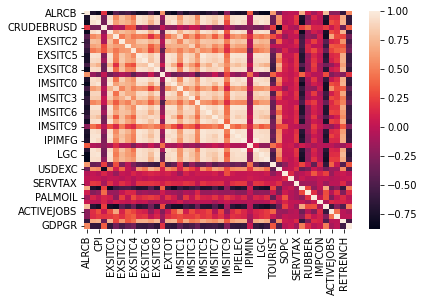

In [ ]:
sns.heatmap(df.corr());

In [ ]:
#3.Select the features identified by Lasso regression

np.random.seed(10)

estimator = LassoCV(cv=5, normalize = True)

sfm = SelectFromModel(estimator, prefit=False, norm_order=1, max_features=None)

sfm.fit(predictors, Target)

feature_idx = sfm.get_support()
Lasso_features = predictors.columns[feature_idx].tolist()
Lasso_features

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18959111919366478, tolerance: 0.13134685129853538
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2728549330267924, tolerance: 0.13134685129853538
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

['CRUDEBRUSD', 'CONSCRE', 'RUBBER', 'OBOCC', 'RETRENCH']

In [ ]:
#4.Perform recursive feature selection and use cross validation to identify the best number of features

#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select= 47, step=10, verbose=5)
rfe_selector.fit(predictors, Target)
rfe_support = rfe_selector.get_support()
rfe_feature = predictors.loc[:,rfe_support].columns.tolist()
rfe_feature

['ALRCB',
 'CIC',
 'CPI',
 'CRUDEBRUSD',
 'EXSITC0',
 'EXSITC1',
 'EXSITC2',
 'EXSITC3',
 'EXSITC4',
 'EXSITC5',
 'EXSITC6',
 'EXSITC7',
 'EXSITC8',
 'EXSITC9',
 'EXTOT',
 'IMSITC0',
 'IMSITC1',
 'IMSITC2',
 'IMSITC3',
 'IMSITC4',
 'IMSITC5',
 'IMSITC6',
 'IMSITC7',
 'IMSITC8',
 'IMSITC9',
 'IMTOT',
 'IPIELEC',
 'IPIMFG',
 'IPIMIN',
 'IPITOT',
 'LGC',
 'LIC',
 'TOURIST',
 'USDEXC',
 'SOPC',
 'SALETAX',
 'SERVTAX',
 'CONSCRE',
 'RUBBER',
 'PALMOIL',
 'IMPCON',
 'OBOCC',
 'ACTIVEJOBS',
 'JOBVACAN',
 'RETRENCH']

In [ ]:
#5.Select the top n features based on absolute value of beta coefficients of features

# define standard scaler
scaler = StandardScaler()
# transform x data
scaled_predictors = scaler.fit_transform(predictors)
scaled_Target = scaler.fit_transform(Target)

sr_reg = LinearRegression(fit_intercept = False).fit(scaled_predictors, scaled_Target)
coef_table = pd.DataFrame(list(predictors.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",sr_reg.coef_.transpose())
coef_table = coef_table.iloc[coef_table.Coefs.abs().argsort()] 


sr_data2 = coef_table.tail(55)
sr_top_features = sr_data2.iloc[:,0].tolist()
sr_top_features

['IMPCON',
 'SALETAX',
 'USDEXC',
 'SOPC',
 'PALMOIL',
 'SERVTAX',
 'JOBVACAN',
 'CONSCRE',
 'ACTIVEJOBS',
 'RUBBER',
 'CRUDEBRUSD',
 'OBOCC',
 'ALRCB',
 'TOURIST',
 'CIC',
 'CPI',
 'LIC',
 'RETRENCH',
 'IPIMIN',
 'IPIELEC',
 'LGC',
 'IPIMFG',
 'IPITOT',
 'EXSITC1',
 'EXSITC9',
 'EXSITC2',
 'IMSITC1',
 'EXSITC0',
 'EXSITC4',
 'EXSITC5',
 'EXSITC6',
 'IMSITC4',
 'IMSITC9',
 'EXSITC3',
 'EXSITC8',
 'IMSITC2',
 'IMSITC0',
 'EXSITC7',
 'IMSITC8',
 'IMSITC6',
 'IMSITC5',
 'EXTOT',
 'IMSITC3',
 'IMSITC7',
 'IMTOT']

In [ ]:
# Combining features from all the models

combined_feature_list = sr_top_features + Lasso_features + corr_top_features + rf_top_features

combined_feature = {x:combined_feature_list.count(x) for x in combined_feature_list}
combined_feature_data = pd.DataFrame.from_dict(combined_feature,orient='index')

combined_feature_data.rename(columns={ combined_feature_data.columns[0]: "number_of_models" }, inplace = True)


combined_feature_data = combined_feature_data.sort_values(['number_of_models'], ascending=[False])

combined_feature_data

,number_of_models
OBOCC,4
RETRENCH,4
LGC,3
CONSCRE,3
RUBBER,3
CRUDEBRUSD,3
IMPCON,2
EXSITC8,2
EXSITC4,2
EXSITC5,2


In [ ]:
from google.colab import files
combined_feature_data.to_csv('features.csv') 
files.download('features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Transformation - Federal reserve NY**

In [101]:
from google.colab import files
data_to_load = files.upload()

Saving gdp_arcsinh.csv to gdp_arcsinh.csv


In [102]:
%matplotlib inline
import io
import types
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import math

In [103]:
def transform(column, transforms):
    transformation = transforms[column.name]
    # For quarterly data like GDP, we will compute
    # annualized percent changes
    mult = 4 if column.index.freqstr[0] == 'Q' else 1
    
    # 1 => No transformation
    if transformation == 1:
        pass
    # 2 => First difference
    elif transformation == 2:
        column = column.diff()
    # 3 => Second difference
    elif transformation == 3:
        column = column.diff().diff()
    # 4 => Log
    elif transformation == 4:
        column = np.log(column)
    # 5 => Log first difference, multiplied by 100
    #      (i.e. approximate percent change)
    elif transformation == 5:
        column = np.log(column).diff() * 100
    # 6 => Log second difference, multiplied by 100
    elif transformation == 6:
        column = np.log(column).diff().diff() * 100
    # 7 => Exact percent change, multiplied by 100
    #      with optional annualization
    elif transformation == 7:
        column = ((column / column.shift(1))**mult - 1.0) * 100
    # 8 => Log first difference, multiplied by 100
    #      (i.e. approximate percent change)
    #      with optional multiplier for annualization
    elif transformation == 8:
        column = np.log(column).diff() * 100 * mult
    # 9 => Log second difference, multiplied by 100
    #      with optional multiplier for annualization
    elif transformation == 9:
        column = np.log(column).diff().diff() * 100 * mult
    # 10 => Exact percent change, multiplied by 100
    #      with optional annualization
    elif transformation == 10:
        column = ((column / column.shift(1)) - 1.0) * 100
    elif transformation == 11:
        column = np.arcsinh(column).diff() * 100
    elif transformation == 12:
        column = np.arccosh(column).diff() * 100
    elif transformation == 13:
        column = np.arctanh(column).diff() * 100

      
    return column

In [104]:
def load_transformation():
        
    
    # 1. Download data
    #orig_m = (pd.read_csv(f'{base_url}/monthly/{vintage}.csv').dropna(how='all'))
    orig_m = (pd.read_csv(io.BytesIO(data_to_load['gdp_arcsinh.csv']),parse_dates=["DATE"]))
    
    # 2. Extract transformation information
    transform_m = orig_m.iloc[0, 1:]
    orig_m = orig_m.iloc[1:]

    # 3. Extract the date as an index
    orig_m.index = pd.PeriodIndex(orig_m.DATE.tolist(), freq='M')
    orig_m.drop('DATE', axis=1, inplace=True)

    # 4. Apply the transformations
    dta_m = orig_m.apply(transform, axis=0, transforms=transform_m)

    orig_m=orig_m
    dta_m=dta_m
    transform_m=transform_m

    df =pd.DataFrame(dta_m)

    #return types.SimpleNamespace(orig_m=orig_m, dta_m=dta_m, )    

    return df

df = load_transformation()
df
      

,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,EXSITC5,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
2005-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.995966
2005-02,-0.496013,0.506290,0.115532,7.105116,-8.982409,-35.626410,-13.418091,-9.683886,-15.344619,1.266593,...,1072.327616,2.533110,149.517364,-17.701760,-3.379075,9.602007,-27.436272,-5.971614,-131.304269,7.382329
2005-03,-0.832118,0.629279,0.000000,6.814327,26.095991,24.717612,27.704550,23.630549,28.116789,17.172810,...,-110.186853,2.396097,-254.109670,4.967788,-60.210891,-0.258410,-148.314279,-289.289787,1499.011031,5.124904
2005-04,1.163063,-0.377092,0.230665,-10.815266,-10.370720,15.463698,-1.990960,-3.424526,-11.656922,-5.435797,...,-669.817472,-3.068073,-41.481822,4.035003,-424.310825,3.974763,178.927415,296.182847,-207.845968,6.764701
2005-05,-0.496823,-0.505011,0.803164,4.425080,2.191055,-20.406791,-8.173208,-8.448781,14.356938,-10.448526,...,615.991687,4.636498,32.267903,11.362740,463.638296,-3.507468,-27.796838,-6.128699,-1333.390786,7.149748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,-0.882352,4.151355,0.000000,-7.654788,3.273904,40.800302,32.518756,-18.495145,-17.721047,1.311638,...,-808.069666,-157.614245,-9.716186,-3.313453,-84.232288,-2.247295,173.911842,20.608802,53.342269,2.122863
2021-09,1.418221,3.808101,0.244590,9.104542,-0.024730,-7.964619,7.132654,7.411555,31.636792,4.607670,...,36.218804,-50.993286,-51.712896,-10.205432,266.365354,22.547269,-113.041987,71.493638,-5.439545,-4.500000
2021-10,-0.905884,0.797492,0.730202,10.778796,6.926265,12.885096,-6.670146,6.363435,-5.511146,7.775388,...,501.973060,55.056507,-35.394406,21.963524,106.395302,97.051045,105.252398,-72.581716,19.289049,1.625791
2021-11,0.560117,10.532801,0.242221,-23.328502,3.673266,7.936170,-4.856727,1.722484,8.287969,-0.222596,...,197.864724,83.032504,0.623443,-21.491067,73.994675,113.497482,1.532874,0.164113,-31.202649,1.019373


In [105]:
df.isnull().sum()

ALRCB         1
CIC           1
CPI           1
CRUDEBRUSD    1
EXSITC0       1
EXSITC1       1
EXSITC2       1
EXSITC3       1
EXSITC4       1
EXSITC5       1
EXSITC6       1
EXSITC7       1
EXSITC8       1
EXSITC9       1
EXTOT         1
IMSITC0       1
IMSITC1       1
IMSITC2       1
IMSITC3       1
IMSITC4       1
IMSITC5       1
IMSITC6       1
IMSITC7       1
IMSITC8       1
IMSITC9       1
IMTOT         1
IPIELEC       1
IPIMFG        1
IPIMIN        1
IPITOT        1
LGC           1
LIC           1
TOURIST       1
USDEXC        1
SOPC          1
SALETAX       1
SERVTAX       1
CONSCRE       1
RUBBER        1
PALMOIL       1
IMPCON        1
OBOCC         1
ACTIVEJOBS    1
JOBVACAN      1
RETRENCH      1
GDPGR         0
dtype: int64

In [106]:
df_tra = df.copy()
df_tra.shape

(204, 46)

In [107]:
# making new data frame with dropped NA values 
new_df = df_tra.dropna(axis = 0, how ='any') 
    
new_df

,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,EXSITC5,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
2005-02,-0.496013,0.506290,0.115532,7.105116,-8.982409,-35.626410,-13.418091,-9.683886,-15.344619,1.266593,...,1072.327616,2.533110,149.517364,-17.701760,-3.379075,9.602007,-27.436272,-5.971614,-131.304269,7.382329
2005-03,-0.832118,0.629279,0.000000,6.814327,26.095991,24.717612,27.704550,23.630549,28.116789,17.172810,...,-110.186853,2.396097,-254.109670,4.967788,-60.210891,-0.258410,-148.314279,-289.289787,1499.011031,5.124904
2005-04,1.163063,-0.377092,0.230665,-10.815266,-10.370720,15.463698,-1.990960,-3.424526,-11.656922,-5.435797,...,-669.817472,-3.068073,-41.481822,4.035003,-424.310825,3.974763,178.927415,296.182847,-207.845968,6.764701
2005-05,-0.496823,-0.505011,0.803164,4.425080,2.191055,-20.406791,-8.173208,-8.448781,14.356938,-10.448526,...,615.991687,4.636498,32.267903,11.362740,463.638296,-3.507468,-27.796838,-6.128699,-1333.390786,7.149748
2005-06,-0.666240,0.378997,0.114213,8.355977,2.529714,19.846849,6.129793,-0.539864,-0.014975,-7.175456,...,-204.344070,1.908231,450.842703,98.238680,-93.890020,-0.817970,-61.467351,-227.547434,1554.368247,4.964823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,-0.882352,4.151355,0.000000,-7.654788,3.273904,40.800302,32.518756,-18.495145,-17.721047,1.311638,...,-808.069666,-157.614245,-9.716186,-3.313453,-84.232288,-2.247295,173.911842,20.608802,53.342269,2.122863
2021-09,1.418221,3.808101,0.244590,9.104542,-0.024730,-7.964619,7.132654,7.411555,31.636792,4.607670,...,36.218804,-50.993286,-51.712896,-10.205432,266.365354,22.547269,-113.041987,71.493638,-5.439545,-4.500000
2021-10,-0.905884,0.797492,0.730202,10.778796,6.926265,12.885096,-6.670146,6.363435,-5.511146,7.775388,...,501.973060,55.056507,-35.394406,21.963524,106.395302,97.051045,105.252398,-72.581716,19.289049,1.625791
2021-11,0.560117,10.532801,0.242221,-23.328502,3.673266,7.936170,-4.856727,1.722484,8.287969,-0.222596,...,197.864724,83.032504,0.623443,-21.491067,73.994675,113.497482,1.532874,0.164113,-31.202649,1.019373


In [108]:
# creating features and label variable
X = new_df[['ALRCB','CIC','CPI','CRUDEBRUSD','EXSITC0','EXSITC1','EXSITC2','EXSITC3','EXSITC4','EXSITC5','EXSITC6','EXSITC7','EXSITC8','EXSITC9','EXTOT','IMSITC0','IMSITC1','IMSITC2','IMSITC3','IMSITC4','IMSITC5','IMSITC6','IMSITC7','IMSITC8','IMSITC9','IMTOT','IPIELEC','IPIMFG','IPIMIN','IPITOT','LGC','LIC','TOURIST','USDEXC','SOPC','SALETAX','SERVTAX','CONSCRE','RUBBER','PALMOIL','IMPCON','OBOCC','RETRENCH','ACTIVEJOBS','JOBVACAN']]
y = new_df[["GDPGR"]]

In [109]:
# Function to check stationarity

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [110]:
# Data Prep

AI_Model_data = pd.concat([y, X], axis=1, sort=False)
#AI_Model_data = AI_Model_data.dropna()
# Check stationarity

# ADF Test on each column
for name, column in AI_Model_data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "GDPGR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.7139
 No. Lags Chosen       = 14
 Critical value 1%     = -3.466
 Critical value 5%     = -2.877
 Critical value 10%    = -2.575
 => P-Value = 0.8431. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "ALRCB" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -6.5705
 No. Lags Chosen       = 1
 Critical value 1%     = -3.463
 Critical value 5%     = -2.876
 Critical value 10%    = -2.574
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CIC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Si

In [111]:
#Save transformation
from google.colab import files
new_df.to_csv('gdp_arcsinh.csv') 
files.download('gdp_arcsinh.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
from google.colab import files
data_to_load = files.upload()

Saving gdp_arcsinh.csv to gdp_arcsinh (1).csv


In [113]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# data setup
import io
data = pd.read_csv(io.BytesIO(data_to_load['gdp_arcsinh.csv']),parse_dates=["DATE"])
data.head()

,DATE,ALRCB,CIC,CPI,CRUDEBRUSD,EXSITC0,EXSITC1,EXSITC2,EXSITC3,EXSITC4,...,SERVTAX,CONSCRE,RUBBER,PALMOIL,IMPCON,OBOCC,ACTIVEJOBS,JOBVACAN,RETRENCH,GDPGR
0,2005-02-01,-0.496013,0.506290,0.115532,7.105116,-8.982409,-35.626410,-13.418091,-9.683886,-15.344619,...,1072.327616,2.533110,149.517363,-17.701760,-3.379075,9.602007,-27.436272,-5.971614,-131.304269,7.382329
1,2005-03-01,-0.832118,0.629279,0.000000,6.814327,26.095991,24.717612,27.704550,23.630549,28.116789,...,-110.186853,2.396097,-254.109670,4.967788,-60.210891,-0.258410,-148.314279,-289.289787,1499.011031,5.124904
2,2005-04-01,1.163063,-0.377092,0.230665,-10.815266,-10.370720,15.463698,-1.990960,-3.424526,-11.656922,...,-669.817472,-3.068073,-41.481822,4.035003,-424.310825,3.974763,178.927415,296.182847,-207.845968,6.764701
3,2005-05-01,-0.496823,-0.505011,0.803164,4.425080,2.191055,-20.406791,-8.173208,-8.448781,14.356938,...,615.991687,4.636498,32.267903,11.362740,463.638297,-3.507468,-27.796838,-6.128699,-1333.390786,7.149748
4,2005-06-01,-0.666240,0.378997,0.114213,8.355977,2.529714,19.846849,6.129793,-0.539864,-0.014975,...,-204.344070,1.908231,450.842703,98.238680,-93.890020,-0.817970,-61.467351,-227.547434,1554.368247,4.964823


In [114]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,2], name = data.iloc[:,2].name, line = dict(color = '#FF0000'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,3], name = data.iloc[:,3].name, line = dict(color = '#CD853F'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,4], name = data.iloc[:,4].name, line = dict(color = '#483D8B'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,5], name = data.iloc[:,5].name, line = dict(color = '#00008B'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,6], name = data.iloc[:,6].name, line = dict(color = '#8B4513'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,7], name = data.iloc[:,7].name, line = dict(color = '#7B68EE'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,8], name = data.iloc[:,8].name, line = dict(color = '#800080'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,9], name = data.iloc[:,9].name, line = dict(color = '#87CEEB'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,10], name = data.iloc[:,10].name, line = dict(color = '#FFDAB9'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,11], name = data.iloc[:,11].name, line = dict(color = '#32CD32'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,12], name = data.iloc[:,12].name, line = dict(color = '#D8BFD8'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,13], name = data.iloc[:,13].name, line = dict(color = '#DDA0DD'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,14], name = data.iloc[:,14].name, line = dict(color = '#6495ED'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,15], name = data.iloc[:,15].name, line = dict(color = '#FFA07A'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,16], name = data.iloc[:,16].name, line = dict(color = '#4682B4'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,17], name = data.iloc[:,17].name, line = dict(color = '#556B2F'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,18], name = data.iloc[:,18].name, line = dict(color = '#9ACD32'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,19], name = data.iloc[:,19].name, line = dict(color = '#B0C4DE'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,20], name = data.iloc[:,20].name, line = dict(color = '#9370DB'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,21], name = data.iloc[:,21].name, line = dict(color = '#DAA520'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,22], name = data.iloc[:,22].name, line = dict(color = '#0000CD'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,23], name = data.iloc[:,23].name, line = dict(color = '#008080'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,24], name = data.iloc[:,24].name, line = dict(color = '#B8860B'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,25], name = data.iloc[:,25].name, line = dict(color = '#FFD700'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,26], name = data.iloc[:,26].name, line = dict(color = '#800000'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,27], name = data.iloc[:,27].name, line = dict(color = '#FF8C00'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,28], name = data.iloc[:,28].name, line = dict(color = '#B0E0E6'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,29], name = data.iloc[:,29].name, line = dict(color = '#FF00FF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,30], name = data.iloc[:,30].name, line = dict(color = '#F4A460'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,31], name = data.iloc[:,31].name, line = dict(color = '#FFFF00'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,32], name = data.iloc[:,32].name, line = dict(color = '#D2691E'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,33], name = data.iloc[:,33].name, line = dict(color = '#7FFFD4'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,34], name = data.iloc[:,34].name, line = dict(color = '#0000FF'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,35], name = data.iloc[:,35].name, line = dict(color = '#FFEFD5'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,36], name = data.iloc[:,36].name, line = dict(color = '#EEE8AA'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,37], name = data.iloc[:,37].name, line = dict(color = '#FFA500'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,38], name = data.iloc[:,38].name, line = dict(color = '#9400D3'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,39], name = data.iloc[:,39].name, line = dict(color = '#FFDEAD'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,40], name = data.iloc[:,40].name, line = dict(color = '#66CDAA'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,41], name = data.iloc[:,41].name, line = dict(color = '#8B008B'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,42], name = data.iloc[:,42].name, line = dict(color = '#D2B48C'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,43], name = data.iloc[:,43].name, line = dict(color = '#ADFF2F'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,44], name = data.iloc[:,44].name, line = dict(color = '#008000'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,45], name = data.iloc[:,45].name, line = dict(color = '#F5DEB3'), opacity = 0.8))
fig.add_trace(go.Scatter(x=data.DATE, y=data.iloc[:,46], name = data.iloc[:,46].name, line = dict(color = '#000000'), opacity = 1.0))